# Домашнее задание 5 (бонусное). Обучение с подкреплением. Deep Q-networks.

### Задание 1.  Вам необходимо обучить нейронную сеть на двух играх Atari, используя в качестве наблюдений (observations) память игры. **7 баллов**

Чтобы создать такую версию среды нужно добавить суффикс "ram" в название, например:
```python
env = gym.make("Pong-v0") # обычная версия
env = gym.make("Pong-ram-v0") # версия, использующая память
```

В качестве первой среды вам нужно использовать Pong, вторую среду вы должны выбрать самостоятельно, пользуясь таблицей (не рекомендуется выбирать среды, где human score сильно превосходит DQN). Будьте осторожны, чтобы решить некоторые игры нужны очень нетривиальные подходы, например MontezumaRevenge. Игра считается решенной, если ваш итоговый агент выходит на среднее вознаграждение, указанное в таблице для DQN, с учетом std dev. Например для Pong - это 18.9 (std dev 1.3).	

Чтобы получить **полный балл** за это задание вы должны представить:
1. код обучения
2. график сходимости (среднее вознаграждение)
3. веса модели
4. код для запуска модели с готовыми весами (он должен корректно работать в колабе) 
5. ваши выводы по используемым гиперпараметрам (размер replay buffer'а, learning rate и т.д.). 

На семинаре мы разобрали самый простой вариант аппроксимации Q-функции нейронной сетью. Для успешного выполнения этого задания вам потребуется использовать несколько дополнительных техник: replay buffer, frame skip, target network, которые были реализованы в оригинальной [статье](https://arxiv.org/pdf/1312.5602.pdf) Deep Mind.

В качестве заготовки вы можете воспользоваться следующим кодом: 
[practical-rl-homework-tf](https://github.com/yandexdataschool/Practical_RL/blob/spring20/week04_approx_rl/homework_tf.ipynb)
, но обратите внимание, что здесь сеть учится на картинках. Для ram версии среды, рекомендуется использовать упрощенную сеть (несколько Dense слоев). 
Вам **не запрещается** пользоваться другим кодом, найденным **лично вами**.

### Задание 2. Повторяем DQN. Вам нужно решить одну из игр Atari, которая в качестве наблюдения выдает изображение. **3 балла**.

В данном задании ваш агент будет использовать в качестве наблюдения картинку. 
Одним из способов облегчить агенту жизнь - это использовать предобработку изображения, например сделать изображение черно-белым. Обратите внимание, что это задание не такое простое, хоть за него и дается всего 3 балла. На обучение архитектуры нейронной сети, представленной в статье у вас может уйти больше 10 часов в google colab, поэтому сразу решите проблему с сохраниением весов вашей модели. 

В данном задании агент взаимодействует с неполным состоянием среды, поэтому вам может помочь такая техника, как frame stack.  

Для полного балла вам необходимо выполнить те же 5 пунктов, из задания 1. 

## Вам может пригодиться:



### Визуализация Atari игр в Colab.

Устанавливаем виртуальный дисплей, для рендера окружений в colab:

In [0]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import disp**7 баллов**lay as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

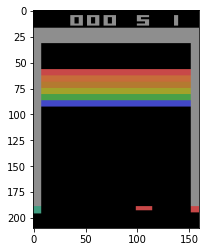

In [0]:
env = gym.make("Breakout-v0")
env.reset()
prev_screen = env.render(mode="rgb_array")
plt.imshow(prev_screen)
env.close()

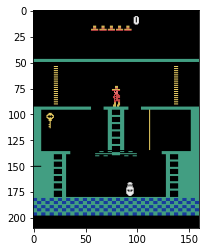

In [0]:
env = gym.make("MontezumaRevenge-ram-v0")
env.reset()
prev_screen = env.render(mode="rgb_array")
plt.imshow(prev_screen)
env.close()

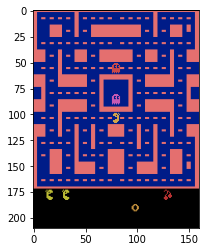

In [0]:
env = gym.make("MsPacman-ram-v0")
env.reset()
prev_screen = env.render(mode="rgb_array")
plt.imshow(prev_screen)
env.close()

### Таблица с результатами людей и алгоритма DQN на всех задачах Atari:

|Game| DQN (reward, std dev)  | Human   | 
|---|---|---|
| Asterix                | 6012.0 (1744.0) | 8503 |
| Beam Rider             | 6846.0 (1619.0) | 5775 |
| Breakout               | 401.2 (26.9) | 31.8 |
| Enduro              | 301.8 (24.6) | 309.6 |
| Freeway                | 30.3 (0.7) | 29.6 |
| Pong                   | 18.9 (1.3) | 9.3 |
| Q*Bert                 | 10596.0 (3294.0) | 13455 |
| Seaquest               | 5286.0 (1310.0) | 20182 |
| Space Invaders         | 1976.0 (893.0) | 1652 |
| Alien                  | 3069.0 (1093.0) | 6875 |
| Amidar                 | 739.5 (3024.0) | 1676 |
| Assault                | 3359.0 (775.0) | 1496 |
| Asteroids              | 1629.0 (542.0) | 13157 |
| Atlantis               | 85641.0 (17600.0) | 29028 |
| Bank Heist             | 429.7 (650.0) | 734.4 |
| Battle Zone            | 26300.0 (7725.0) | 37800 |
| Bowling                | 42.4 (88.0) | 154.8 |
| Boxing                 | 71.8 (8.4) | 4.3 |
| Centipede              | 8309.0 (5237.0) | 11963 |
| Chopper Command        | 6687.0 (2916.0) | 9882 |
| Crazy Climber          | 114103.0 (22797.0) | 35411 |
| Demon Attack           | 9711.0 (2406.0) | 3401 |
| Double Dunk            | -18.1 (2.6) | -15.5 |
| Fishing Derby          | -0.8 (19.0) | 5.5 |
| Frostbite              | 328.3 (250.5) | 4335 |
| Gopher              | 8520.0 (32.8) | 2321 |
| Gravitar               | 306.7 (223.9) | 2672 |
| H.E.R.O.               | 19950.0 (158.0) | 25673 |
| Ice Hockey             | -1.6 (2.5) | 0.9 |
| James Bond             | 576.7 (175.5) | 406.7 |
| Kangaroo               | 6740.0 (2959.0) | 3035 |
| Krull               | 3805.0 (1033.0) | 2395 |
| Kung-Fu Master         | 23270.0 (5955.0) | 22736 |
| Montezuma’s Revenge    | 0.0 (0.0) | 4367 |
| Ms. Pac-Man            | 2311.0 (525.0) | 15693 |
| Name This Game         | 7257.0 (547.0) | 4076 |
| Private Eye            | 1788.0 (5473.0) | 69571 |
| River Raid             | 8316.0 (1049.0) | 13513 |
| Road Runner            | 18257.0 (4268.0) | 7845 |
| Robotank            | 51.6 (4.7) | 11.9 |
| Star Gunner            | 57997.0 (3152.0) | 10250 |
| Tennis              | -2.5 (1.9) | -8.9 |
| Time Pilot             | 5947.0 (1600.0) | 5925 |
| Tutankham              | 186.7 (41.9) | 167.7 |
| Up and Down         | 8456.0 (3162.0) | 9082 |
| Venture             | 380.0 (238.6) | 1188 |
| Video Pinball          | 42684.0 (16287.0) | 17298 |
| Wizard of Wor          | 3393.0 (2019.0) | 4757 |
| Zaxxon                 | 4977.0 (1235.0) | 9173 |